In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/drive/My Drive/CIS-5190-Project/Code/cleaned/china.csv', header = 0)

In [4]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [5]:
df.sort_values('date')

,date,weighted_vader
0,2008-01-26,-0.000000
1,2008-01-28,0.000000
2,2008-01-30,-0.000000
3,2008-02-01,0.086562
4,2008-02-06,-0.000000
...,...,...
225889,2022-12-31,-0.000000
225890,2022-12-31,-0.234022
225891,2022-12-31,-0.234022
225893,2022-12-31,-0.000000


In [6]:
df = df.groupby('date').mean().reset_index()

In [7]:
df

,date,weighted_vader
0,2008-01-26,0.000000
1,2008-01-28,0.000000
2,2008-01-30,0.000000
3,2008-02-01,0.086562
4,2008-02-06,0.000000
...,...,...
4830,2022-12-27,-0.317141
4831,2022-12-28,-0.303395
4832,2022-12-29,-0.249338
4833,2022-12-30,-0.184692


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
full_date_range = pd.DataFrame({'date': pd.date_range(start='2008-01-01', end='2023-01-01')})


In [10]:
full_df = full_date_range.merge(df, on='date', how='left')


In [11]:
full_df[['weighted_vader']] = full_df[['weighted_vader']].ewm(span=50, adjust=False).mean()


In [12]:
full_df[['reddit_china_sent']] = full_df[['weighted_vader']].fillna(method='ffill')

In [13]:
full_df[['reddit_china_sent']] = full_df[['reddit_china_sent']].fillna(method='bfill')

In [14]:
full_df = full_df[['date', 'reddit_china_sent']]

In [15]:
full_df.to_csv("reddit_china_sent.csv")

In [16]:
full_df

,date,reddit_china_sent
0,2008-01-01,0.000000
1,2008-01-02,0.000000
2,2008-01-03,0.000000
3,2008-01-04,0.000000
4,2008-01-05,0.000000
...,...,...
5475,2022-12-28,-0.167993
5476,2022-12-29,-0.171183
5477,2022-12-30,-0.171713
5478,2022-12-31,-0.170288


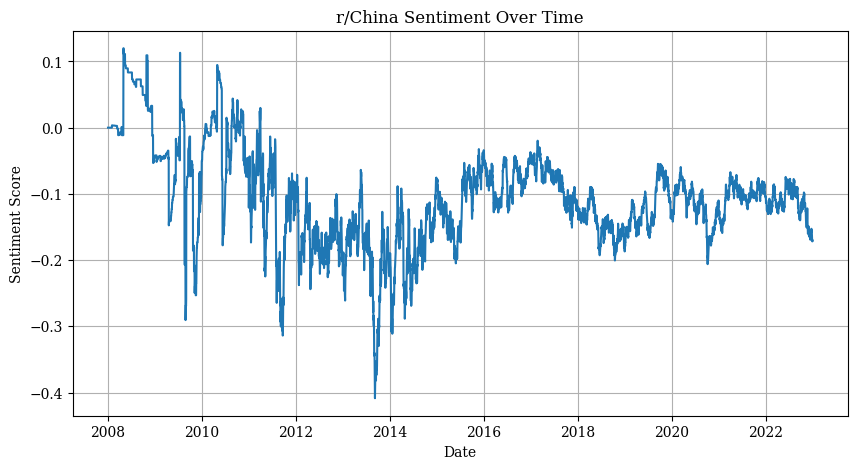

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'


plt.figure(figsize=(10, 5))
plt.plot(full_df['date'], full_df['reddit_china_sent'], linestyle='-')
plt.title('r/China Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()